In [1]:
import sys
sys.path.append("../")
from GeoToolkit.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
from GeoToolkit.graphics import colors,graphics
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
import numpy as np
import matplotlib
from matplotlib import axes
from matplotlib import pyplot
from matplotlib import figure
from matplotlib import colors
import matplotlib.pyplot as plt

C:\Users\aleow\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
download = DataIO.fetchData(path="./assets", localCloud='Local')
display(download)

interactive(children=(RadioButtons(description='File Type:', options=('Local', 'Cloud'), value='Local'), Text(…

In [9]:
grid = download.result[0]

 # Parse contour values
if Contours is not "":
        vals = re.split(',', Contours)
        cntrs = []
        
        for val in vals:
            if ":" in val:
                param = np.asarray(re.split(":", val), dtype='int')
                cntrs += [np.arange(param[0], param[2], param[1])]

            else:
                cntrs += [np.float(val)]
                Contours = np.unique(np.sort(np.hstack(cntrs)))
else:
        Contours = None

NameError: name 'Contours' is not defined

In [10]:
data=grid.values
vmin = data[~np.isnan(data)].min()
vmax = data[~np.isnan(data)].max()
range = vmax-vmin
sigma= 0.1*range
v_uplim= vmax-sigma
v_lowlim= vmin+sigma
print(v_uplim,v_lowlim)

793.7421508789063 -193.7839599609375


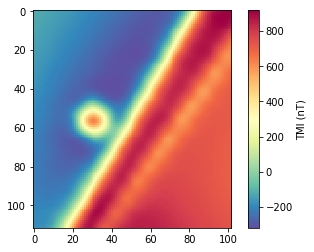

In [11]:
axs = plt.subplot()
plt.imshow(grid.values,cmap='Spectral_r')
cbar=plt.colorbar()
cbar.set_label('TMI (nT)')


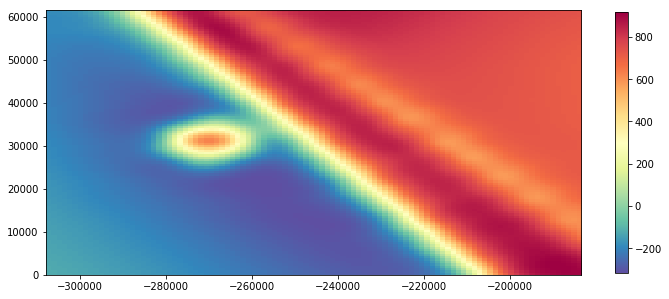

In [12]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(grid.values,ax,cmap='Spectral_r',cmap_norm='nonorm',hs=False,colorbar=True,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

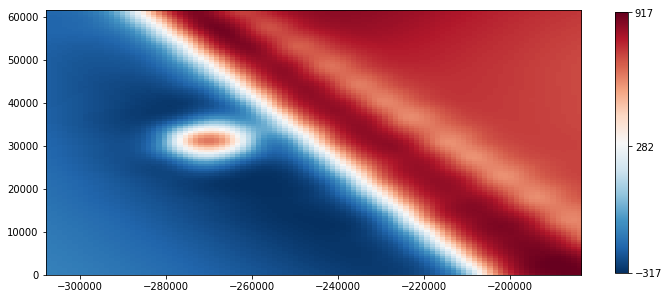

In [13]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(grid.values,ax,cmap='RdBu_r',cmap_norm='nonorm',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

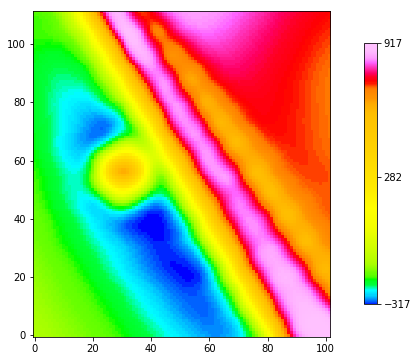

In [14]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(grid.values,ax,cmap='geosoft',cmap_norm='equalize',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,label='TMI (nT)',
                   origin='lower')

axs.set_xlabel("Easting (m)", size=14)
axs.set_ylabel("Northing (m)", size=14)
axs.grid('on', color='k', linestyle='--')

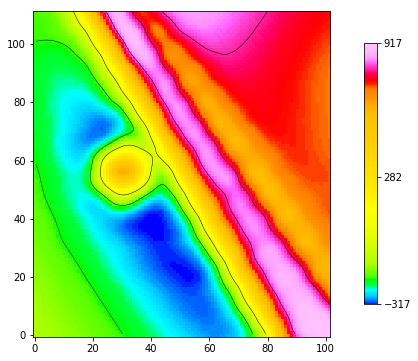

In [15]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(grid.values,ax,cmap='geosoft',cmap_norm='equalize',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,
                   contours=True,levels=[v_lowlim,0,v_uplim],
                   origin='lower')



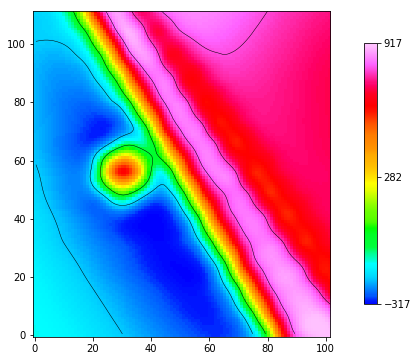

In [16]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(grid.values,ax,cmap='geosoft',cmap_norm='autolevels',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,minPercent=2,maxPercent=98,
                   contours=True,levels=[v_lowlim,0,v_uplim],
                  origin='lower')

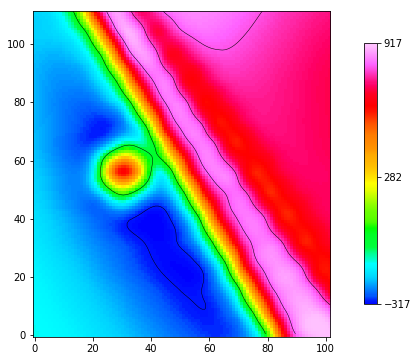

In [17]:
#contours
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(grid.values,ax,cmap='geosoft',cmap_norm='autolevels',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,minPercent=2,maxPercent=98,
                   contours=True,levels=[-600,-300,0,800],
                  origin='lower')

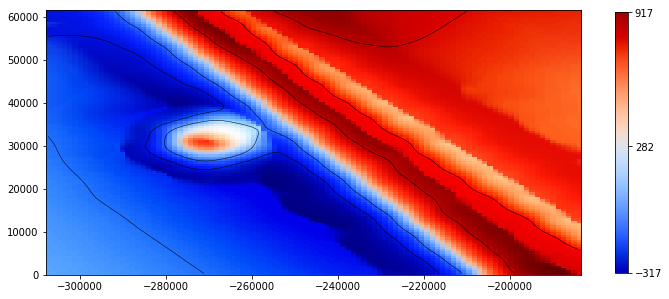

In [18]:
#hillshade
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(grid.values,ax,cmap='coolwarm',cmap_norm='autolevels',hs=True,colorbar=True,
                   cb_ticks='stats',nSigma=2,azdeg=45,altdeg=45,blend_mode='soft',
                   contours=True,levels=[v_lowlim,0,v_uplim],
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

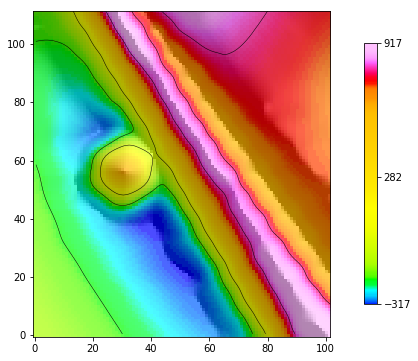

In [19]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(grid.values,ax,cmap='geosoft',cmap_norm='equalize',hs=True,colorbar=True,
                   cb_ticks='stats',nSigma=2,azdeg=45,altdeg=45,blend_mode='alpha',alpha=0.7,
                   contours=True,levels=[v_lowlim,0,v_uplim],
                  origin='lower')

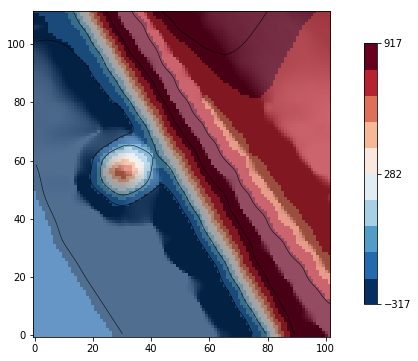

In [25]:

# histogram equalization
import matplotlib.colors as mcolors
mynorm = mcolors.BoundaryNorm(graphics.stats_boundaries(grid.values,nSigma=1,sigmaStep=0.25),256)
# make nSigma into slider

fig,ax = plt.subplots(figsize=(12,6))
# https://matplotlib.org/users/colormapnorms.html
graphics.imshow_hs(grid.values,ax,cmap='RdBu_r',cmap_norm='no',hs=True,colorbar=True,norm=mynorm,
                   cb_ticks='stats',nSigma=2,azdeg=45,altdeg=45,blend_mode='alpha',alpha=0.7,
                   contours=True,levels=[vmin,v_lowlim,0,v_uplim,vmax],
                   origin='lower')


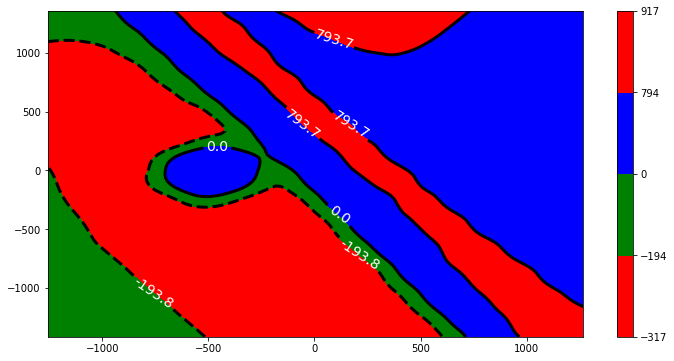

In [32]:
import matplotlib.colors as mcolors
mynorm = mcolors.BoundaryNorm(graphics.stats_boundaries(grid.values,nSigma=2,sigmaStep=0.5),256)

fig, ax = plt.subplots(figsize=(12,6))
# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels=[vmin,v_lowlim,0,v_uplim,vmax]
img = ax.contourf(grid.hx, grid.hy, grid.values, levels,
                   colors=('r', 'g', 'b'),
                   origin='lower'
                   )
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS.cmap.set_under('blue')
CS.cmap.set_over('red')

CS = ax.contour(grid.hx,grid.hy, grid.values, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin='lower')

ax.clabel(CS, fmt='%2.1f', colors='w', fontsize=14)
fig.colorbar(img)


SyntaxError: invalid syntax (<ipython-input-22-4ff6d680d339>, line 3)

In [ ]:
#get contour for colormap= equalized histogram


axs = plt.subplot()
out = Simulator.plotDataHillside(download.result, grid.hy, grid.values, alpha=1, alphaHS=0,cmap="RdBu_r")
axs.set_aspect('equal')
plt.imshow(gridObject.values)
cbar=plt.colorbar()
cbar.set_label('TMI (nT)')
axs.set_xlabel("Easting (m)", size=14)
axs.set_ylabel("Northing (m)", size=14)
axs.grid('on', color='k', linestyle='--')
